   position             team  played   won  drawn  lost  goals_for  \
0         1  Atlético Madrid      30  17.0    6.0   7.0      0.087   
1         2          Sevilla      30  17.0    4.0   9.0      0.079   
2         3         Valencia      30  17.0    3.0  10.0      0.064   
3         4        Barcelona      30  16.0    3.0  11.0      0.083   
4         5    Real Sociedad      30  15.0    5.0  10.0      0.077   

   goals_against  goal_difference     points  year  
0          0.050            0.037  44.444444  1950  
1          0.046            0.033  42.222222  1950  
2          0.048            0.016  41.111111  1950  
3          0.061            0.022  38.888889  1950  
4          0.056            0.021  38.888889  1950  
(160, 11)
position             int64
team                object
played               int64
won                float64
drawn              float64
lost               float64
goals_for          float64
goals_against      float64
goal_difference    float64
points  

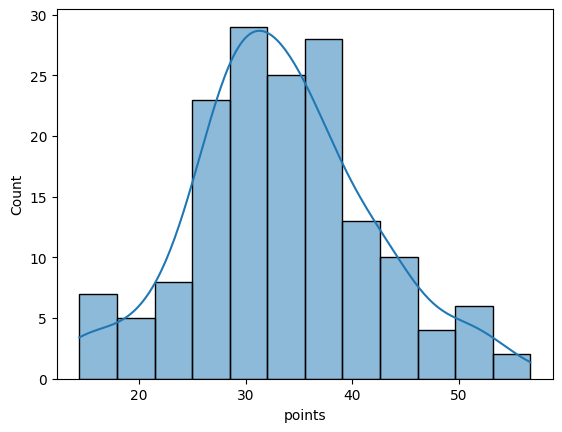

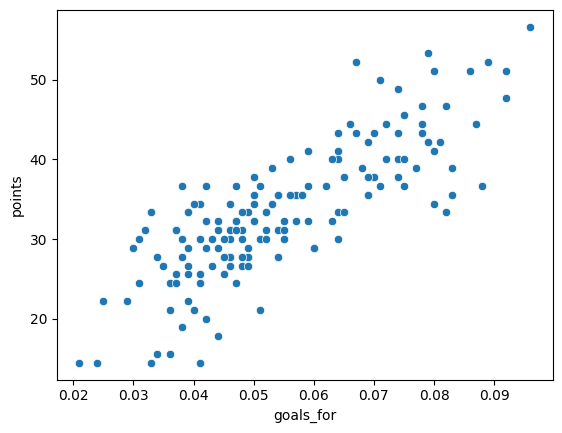

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


la_liga = pd.read_csv('../normalized_data/1950-1960.csv')



     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()



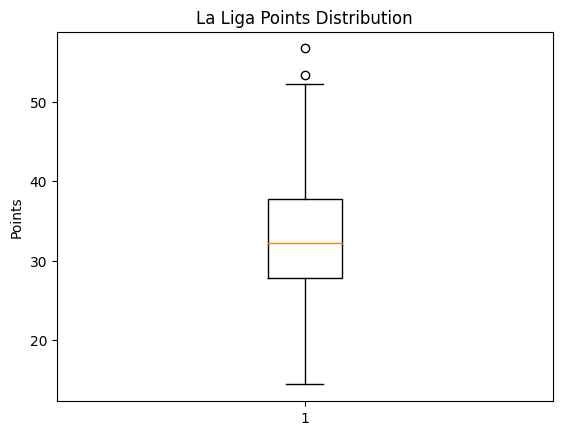

upper bound:  52.77777777777778
lower bound:  12.777777777777779
Outliers:
     position             team  played   won  drawn  lost  goals_for  \
80          1  Atlético Bilbao      30  22.0    4.0   4.0      0.079   
128         1        Barcelona      30  24.0    3.0   3.0      0.096   

     goals_against  goal_difference     points  year  
80           0.031            0.048  53.333333  1955  
128          0.026            0.070  56.666667  1958  


In [19]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print("upper bound: ",upper_bound)
print("lower bound: ",lower_bound)

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

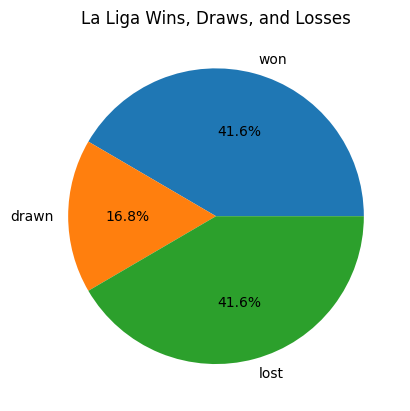

In [20]:

arr=[]
year1=1950
year2=1951
while(year1!=1960):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()





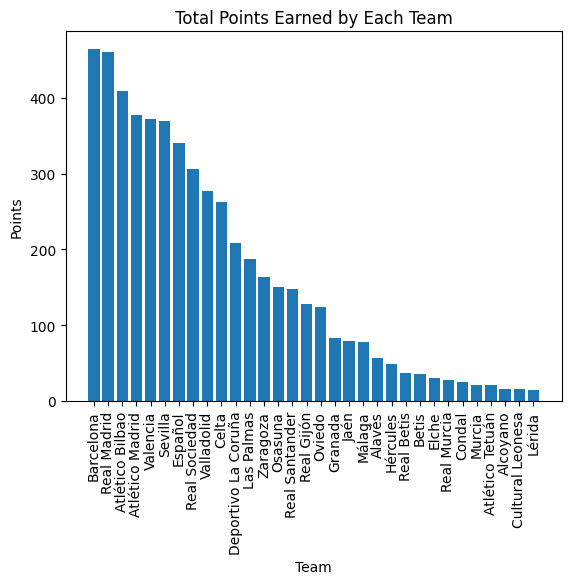

In [21]:

df = pd.read_csv("../normalized_data/1950-1960.csv")

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

